<a href="https://colab.research.google.com/github/fxop0218/PyTorchForBeginners/blob/main/04_ComputerVision_CNN_Beginners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Buildinf a CNN (Convolution Neuronal Network)

**🟦EN**:
* CNN's also known as ConvNets
* CNN's are know gor their capabilities to find patterns on visual data
* To understand how works visit this page [CNN, visual exemple](https://poloclub.github.io/cnn-explainer/)

**🟥ES**:
* CNN también conocidas como ConvNets
* Las CNN son conocidas por su capacidad para encontrar patrones en datos visuales.
* Para entender mejor como funciona, visitar esta pagina [Ejemplo visual de CNN](https://poloclub.github.io/cnn-explainer/)

In [1]:
!pip install torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Imports
import torch
import torchvision
import matplotlib.pyplot as plt
from torch import nn
from torchvision import datasets, transforms, models
from torchvision.transforms import ToTensor

print(f"torch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

torch version: 1.13.0+cu116
torchvision version: 0.14.0+cu116


## 1. Getting a dataset

**🟦EN**: The dataset we will use will be the one from FashionMNIST

**🟥ES**: El primer set de datos que utilizaremos sera el de FashionMNIST

In [3]:
# Setup
train_data = datasets.FashionMNIST(
    root = "data", # The downloaded data is stored in
    train = True, 
    download = True, # True if want to download and false if not
    transform = ToTensor(), # How do we want to transform the data?
    target_transform=None # How dow we want to transform the labels/targets?
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform=None
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [4]:
device = "cuda" if torch.cuda.is_available else "cpu"

In [5]:
print(f"Train length: {len(train_data)} || Test length: {len(test_data)}")

Train length: 60000 || Test length: 10000


In [6]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [7]:
classes = train_data.classes
classes_id = train_data.class_to_idx
# print(f"All classes names: {classes}")
print(f"All classes with their id's: {classes_id}")

All classes with their id's: {'T-shirt/top': 0, 'Trouser': 1, 'Pullover': 2, 'Dress': 3, 'Coat': 4, 'Sandal': 5, 'Shirt': 6, 'Sneaker': 7, 'Bag': 8, 'Ankle boot': 9}


In [8]:
print(f"Image shape: {image.shape}[color chanel, heigth, width]\n")

Image shape: torch.Size([1, 28, 28])[color chanel, heigth, width]



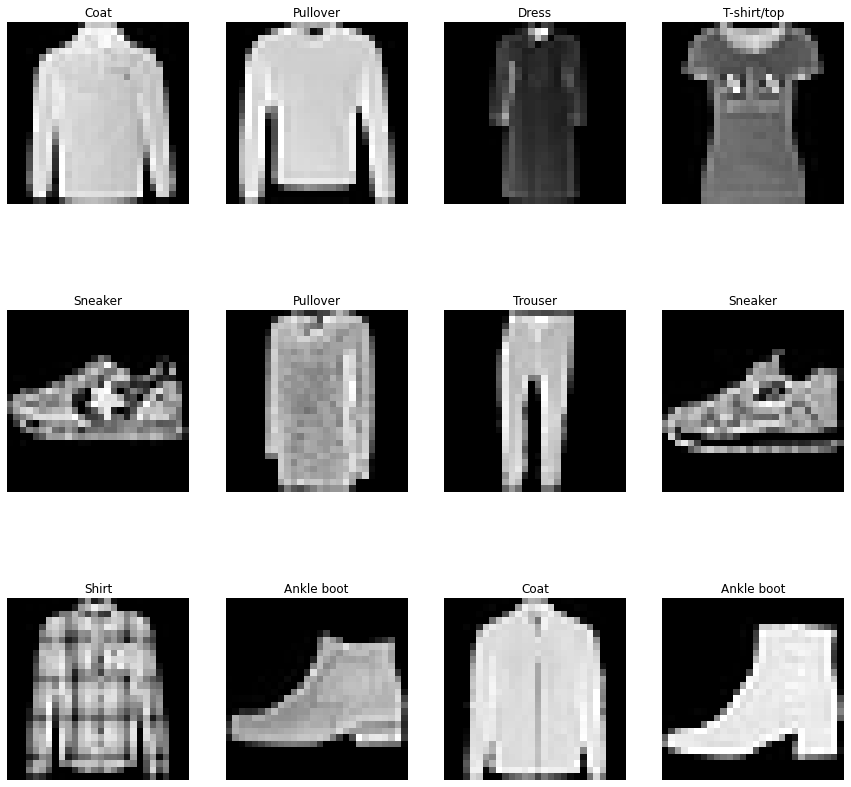

In [9]:
torch.manual_seed(10)

fig = plt.figure(figsize=(15, 15))
row = 3
col = 4

for i in range(1, row * col+1):
  random_index = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_index]
  fig.add_subplot(row, col, i)
  plt.title(classes[label])
  plt.imshow(img.squeeze(), cmap="gray")
  plt.axis(False)

## 2. Prepare DataLoader

**🟦EN**:  Data is in the form of PyTorch Datasets.

DataLoader transform our dataset into Pyton iterable

We want to turn our data into batches. 

Why would we do this??

1. It is more computationally efficient, as in, your computign hardware may not be able to llok at 6000 image in one hit. So we break it down to 32 images at a tiem (Batch size = 32)

2. It gives out neuronal network more chances to update its gradients per epochs.

**🟥ES**: Los datos están en forma de PyTorch Datasets.

DataLoader transforma nuestro dataset en iterable Pyton

Queremos convertir nuestros datos en lotes. 

¿Por qué haríamos esto?

1. Es más eficiente computacionalmente, como en, su hardware computign puede no ser capaz de llok en 6000 imagen en un hit. Así que lo dividimos en 32 imágenes a la vez (tamaño del lote = 32)

2. Esto da a nuestra red neuronal más oportunidades de actualizar sus gradientes por lote. 

In [10]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

# DataSet into iterable
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=True)
print(f"Train DataLoader: {train_dataloader} Test dataloader: {test_dataloader}")
print(f"Length of train DataLoader: {len(train_dataloader)} with batch = {BATCH_SIZE}\nLength of test DataLoader {len(test_dataloader)} with batch = {BATCH_SIZE}")

Train DataLoader: <torch.utils.data.dataloader.DataLoader object at 0x7f0fd02aad00> Test dataloader: <torch.utils.data.dataloader.DataLoader object at 0x7f0fd02aaf10>
Length of train DataLoader: 1875 with batch = 32
Length of test DataLoader 313 with batch = 32


In [11]:
# Check dataloader

train_features_batch, train_labels_batch = next(iter(train_dataloader))
print(f"Train features batch shape: {train_features_batch.shape}\ntrain labels bartch shape: {train_labels_batch.shape}")

Train features batch shape: torch.Size([32, 1, 28, 28])
train labels bartch shape: torch.Size([32])


Image size: torch.Size([1, 28, 28]) || Label: 0, label size: torch.Size([])


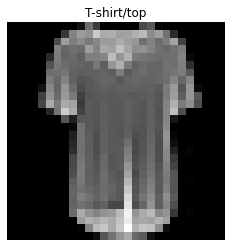

In [12]:
# Show exemple

random_index = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_index], train_labels_batch[random_index]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(classes[label])
plt.axis(False)

print(f"Image size: {img.shape} || Label: {label}, label size: {label.shape}")

## 3. Build model

**🟦EN**: In the next model, we see 2 new type of layers, Conv2d and Maxpool2d
* [*Conv2d*](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html): Applies a 2D convolution over an input signal composed of several input planes.
* [*Maxpool2d*](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html): Applies a 2D max pooling over an input signal composed of several input planes.

**🟥ES**: En el siguiente modelo, vemos 2 nuevos tipos de capas, Conv2d y Maxpool2d
* [*Conv2d*](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html): Aplica una convolución 2D sobre una señal de entrada compuesta por varios planos de entrada.
* [*Maxpool2d*](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html): Aplica un maxpooling 2D sobre una señal de entrada compuesta de varios planos de entrada.

In [13]:
class FashionModelCNNV1(nn.Module):
  def __init__(self,
               input_shape: int,
               output_shape: int,
               hidden_lay: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_lay,
                  kernel_size=3,
                  stride=1,
                  padding=1), # Values we can set outselcen in our NN's
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_lay,
                  out_channels=hidden_lay,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_lay,
                  out_channels=hidden_lay,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_lay,
                  out_channels=hidden_lay,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )

    self.classificator_layer = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_lay*7*7,
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    # print(f"First conv block X shape: {x.shape}")
    
    x = self.conv_block_2(x)
    # print(f"Second conv block X shape: {x.shape}")
    return self.classificator_layer(x) 
    # return self.classificator_layer(self.conv_block_2(self.conv_block_1(x)))


In [14]:
INPUT = len(train_features_batch[1][0][0]) * len(train_features_batch[1][0][1])
OUTPUT = len(classes)

print(f"Input size: {INPUT} || Output: {OUTPUT}")

Input size: 784 || Output: 10


In [15]:
torch.manual_seed(10)
torch.cuda.manual_seed(10)

model_v1 = FashionModelCNNV1(input_shape=1,
                             output_shape=OUTPUT,
                             hidden_lay=20).to(device)

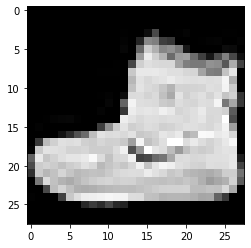

In [16]:
plt.imshow(image.squeeze(), cmap="gray")

### 3.1 Stepping through `nn.Conv2d()` 

In [17]:
torch.manual_seed(10)

images = torch.rand(size=(32, 3, 64, 64))
test_img = images[0]

print(f"Image barch shape {images.shape}\nSingle image shape: {test_img.shape}\nTest image: \n{test_img}")

Image barch shape torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image: 
tensor([[[0.4581, 0.4829, 0.3125,  ..., 0.0177, 0.5417, 0.6575],
         [0.6141, 0.9619, 0.7244,  ..., 0.3651, 0.0916, 0.6161],
         [0.0561, 0.4970, 0.4385,  ..., 0.9545, 0.7324, 0.5577],
         ...,
         [0.2151, 0.7065, 0.9546,  ..., 0.2649, 0.5092, 0.7558],
         [0.0599, 0.0475, 0.9576,  ..., 0.5280, 0.4205, 0.2789],
         [0.0992, 0.7224, 0.3359,  ..., 0.7365, 0.4165, 0.3056]],

        [[0.8798, 0.1387, 0.5025,  ..., 0.4046, 0.4792, 0.9531],
         [0.4569, 0.9987, 0.8911,  ..., 0.5405, 0.5225, 0.5225],
         [0.8199, 0.9475, 0.3062,  ..., 0.7520, 0.4855, 0.0376],
         ...,
         [0.1493, 0.0930, 0.3196,  ..., 0.6219, 0.6361, 0.8130],
         [0.0021, 0.5719, 0.6611,  ..., 0.9513, 0.9481, 0.7927],
         [0.2978, 0.2676, 0.0397,  ..., 0.6166, 0.3377, 0.7027]],

        [[0.2969, 0.2610, 0.9908,  ..., 0.2878, 0.4394, 0.9617],
         [0.3566, 0.

In [18]:
torch.manual_seed(10)
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=OUTPUT,
                       kernel_size=(3, 3),
                       padding=0,
                       stride=1)
# Pass the data through the convolutional layer
conv_out = conv_layer(test_img.unsqueeze(0))
conv_out.shape, test_img.shape

(torch.Size([1, 10, 62, 62]), torch.Size([3, 64, 64]))

In [19]:
test_img.unsqueeze(0).shape

torch.Size([1, 3, 64, 64])

### 3.2 Stepping through `nn.MaxPool2d`

In [20]:
maxpool_layer = nn.MaxPool2d(kernel_size=2)
maxpool_out = maxpool_layer(conv_out)
print(f"Before maxpool: {conv_out.shape} || After maxpool {maxpool_out.shape}")

Before maxpool: torch.Size([1, 10, 62, 62]) || After maxpool torch.Size([1, 10, 31, 31])


In [21]:
torch.manual_seed(10)

random_tensor = torch.randn(size=(1,1,2,2))
print(f"Random tensor:\n{random_tensor}\nRandom tensor shape:\n{random_tensor.shape}\n\n")
max_pool_layer = nn.MaxPool2d(kernel_size=2)

max_pool_tensor = max_pool_layer(random_tensor)
print(f"Max pool tensor:\n{max_pool_tensor}\nMax pool tensor shape:\n{max_pool_tensor.shape}")

Random tensor:
tensor([[[[-0.6014, -1.0122],
          [-0.3023, -1.2277]]]])
Random tensor shape:
torch.Size([1, 1, 2, 2])


Max pool tensor:
tensor([[[[-0.3023]]]])
Max pool tensor shape:
torch.Size([1, 1, 1, 1])


### 3.3 Setup loss and optimizer functions

In [22]:
# Accuracy function
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [23]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_v1.parameters(), lr=0.1)

### 3.4 Train and testing the model, using training and test functions.

In [24]:
def train_step(model: torch.nn.Module,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               dataloader: torch.utils.data.DataLoader,
               accuracy_fn, device: torch.device = device):  
  train_loss = 0
  train_acc = 0

  print(f"train step {device}")

  model.train()
  for batch, (X, y) in enumerate(dataloader):
    X = X.to(device)
    y = y.to(device)
    # Forward pass outputs the raw logits from the model
    y_pred = model(X)

    # Claculate loss
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate test loss
    train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

    optimizer.zero_grad()
    loss.backward()

    # Optimizer step
    optimizer.step()

  train_loss /= len(dataloader)
  train_acc /= len(dataloader)

  print(f"Train loss: {train_loss:.6f} | Train acc: {train_acc:.2f}%")

In [25]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module, 
              accuracy_fn, device: torch.device = device):
  
  test_loss = 0
  test_acc = 0
  
  # Put the model in evaluation mode
  model.eval()

  # Turn on ingerence mode context manager
  with torch.inference_mode():
    for X, y in dataloader:
      # Data to device
      X = X.to(device)
      y = y.to(device)

      # forward pass
      test_pred = model(X)
      
      # Calculate loss and acc
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

    # Adjust metrics
    test_loss /= len(dataloader)
    test_acc /= len(dataloader)

    print(f"Test loss: {test_loss:.6f} | Test acc: {test_acc:.2f}%")  

In [26]:
from timeit import default_timer as timer

def train_time(start: float, end: float, device: torch.device = None):
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [27]:
from tqdm.auto import tqdm

torch.manual_seed(10)
torch.cuda.manual_seed(10)

# Execution time
start_model_v1_timer = timer()#

# Train and test the model

epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epochs: {epoch}\n##########")
  train_step(model=model_v1,
             loss_fn=loss_fn,
             dataloader=train_dataloader,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  
  test_step(model=model_v1,
            loss_fn=loss_fn,
            dataloader=test_dataloader,
            accuracy_fn=accuracy_fn,
            device=device)
  
finsih_model_v1_timer = timer()
train_time(start_model_v1_timer, finsih_model_v1_timer, device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epochs: 0
##########
train step cuda
Train loss: 0.630842 | Train acc: 77.02%
Test loss: 0.386496 | Test acc: 86.22%
Epochs: 1
##########
train step cuda
Train loss: 0.341284 | Train acc: 87.71%
Test loss: 0.339778 | Test acc: 87.50%
Epochs: 2
##########
train step cuda
Train loss: 0.298862 | Train acc: 89.39%
Test loss: 0.308277 | Test acc: 88.56%
Train time on cuda: 40.737 seconds


40.73741067900001

In [28]:
torch.manual_seed(10)
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               accuracy_fn, 
               device: torch.device = device):
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
        
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}


In [29]:
# Model 2 results 

model_v1_res = eval_model(
    model = model_v1,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)

model_v1_res

{'model_name': 'FashionModelCNNV1',
 'model_loss': 0.30833378434181213,
 'model_acc': 88.56829073482429}

In [30]:
def make_preds(model: torch.nn.Module,
               data: list,
               device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample, dim=0).to(device)
      pred_logit = model(sample)

      # Get pred probability (logit to prediction probability)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim = 0)

      # Get pred_prob off the GPU for further calculations
      pred_probs.append(pred_prob.cpu())

  return torch.stack(pred_probs)



In [31]:
import random
random.seed(10)
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# print(f"Test sample: {test_samples[0]}")

Text(0.5, 1.0, 'Sandal')

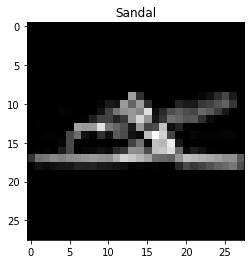

In [32]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(classes[test_labels[0]])

In [33]:
# Make predictions
pred_probs = make_preds(model=model_v1,
                        data=test_samples)

pred_probs[:5]

tensor([[5.0183e-04, 1.4760e-06, 1.1168e-05, 4.3688e-05, 1.6173e-05, 9.9644e-01,
         2.1420e-04, 3.5485e-04, 2.2797e-03, 1.4100e-04],
        [3.4327e-04, 2.9768e-05, 9.3888e-04, 5.9020e-05, 2.5421e-04, 5.3771e-05,
         2.1469e-03, 2.1017e-04, 9.9528e-01, 6.8043e-04],
        [3.4810e-02, 1.9969e-03, 6.3376e-01, 1.9192e-04, 2.7353e-01, 7.6176e-04,
         5.1867e-02, 4.2338e-05, 2.6151e-03, 4.2938e-04],
        [2.8443e-02, 1.3190e-04, 5.9591e-02, 1.0614e-03, 5.2067e-01, 7.8855e-06,
         3.6075e-01, 3.1680e-05, 2.9279e-02, 3.2663e-05],
        [9.7579e-01, 1.9320e-05, 4.5619e-03, 6.1100e-04, 9.6063e-05, 4.4989e-07,
         1.8863e-02, 4.4903e-06, 4.3034e-05, 1.0399e-05]])

In [34]:
pred_class = pred_probs.argmax(dim=1)
pred_class

tensor([5, 8, 2, 4, 0, 2, 8, 4, 3])

In [35]:
test_labels

[5, 8, 6, 6, 0, 2, 8, 4, 3]

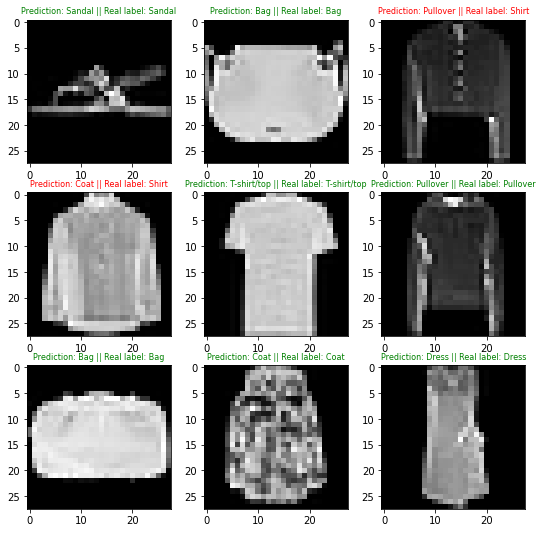

In [36]:
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3

for i, sample in enumerate(test_samples):
  plt.subplot(nrows, ncols, i+1)

  # Plot img
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the pred
  pred_label = classes[pred_class[i]]

  # Get the truth label (in text form)
  truth_label = classes[test_labels[i]]

  # Title
  title = f"Prediction: {pred_label} || Real label: {truth_label}"

  # Check equality between labels
  if pred_label == truth_label:
    plt.title(title, fontsize=8, c="g")
  else:
    plt.title(title, fontsize=8, c="r")

## 4. Confusion matrix

**🟦EN**: Confusion matrix is one of the best way to evaluate a classification model

1. Make predictions with out trained model on the test dataset
2. Make a confusion matrix `torchmetrics.ConfusionMatrix`
3. Plot the confusion matrix usign `mlxtend.plotting.plot_confusion_matrix`

**🟥ES**: La matriz de confusión es uno de los mejores métodos para evaluar un modelo de clasificación.

1. Hacer predicciones con el modelo entrenado en el conjunto de datos de prueba
2. Crear una matriz de confusión `torchmetrics.ConfusionMatrix`.
3. Trazar la matriz de confusión usando `mlxtend.plotting.plot_confusion_matrix`.

In [37]:
from tqdm.auto import tqdm

In [38]:
# Make predictiosn with trained model
y_preds = []
model_v1.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    X = X.to(device)
    y = y.to(device)

    # Forward pass
    y_logit = model_v1(X)

    # Turn predictions from logits to prediction probs to predicion labels
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)

    # Change the device to CPU to evaluation
    y_preds.append(y_pred.cpu())

# Concatenate list of predictions
#print(f"y_preds: {y_preds}")
y_pred_tensor = torch.cat(y_preds)
print(f"Predictions: {y_pred_tensor[:5]}")

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

Predictions: tensor([0, 5, 6, 3, 3])


In [40]:
try: 
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend version should be 0.19.0 or higher"
except:
  !pip install -q torchmetrics -U mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")


mlxtend version: 0.21.0


In [41]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Setup Confusion matrix instance and compare preditiosn to target
c_matrix = ConfusionMatrix(num_classes=len(classes), task="multiclass")
c_matrix_tensor = c_matrix(preds=y_pred_tensor,
                           target=test_data.targets)

c_matrix_tensor

tensor([[ 89,  83,  98, 129, 103,  88, 105, 108, 113,  84],
        [ 82,  96,  93, 131, 106,  87,  94, 106,  97, 108],
        [ 96,  89, 106, 128,  83,  80, 102, 115, 118,  83],
        [ 94,  91, 103, 113, 108,  78, 109, 112,  92, 100],
        [ 90,  87, 106, 128,  85,  81, 103, 104, 124,  92],
        [ 82,  97, 103, 116,  94,  84,  97, 110, 121,  96],
        [ 90,  78,  95, 119, 101,  79, 121, 114, 103, 100],
        [ 79,  94, 103, 124,  84,  83, 120, 110, 109,  94],
        [107, 107,  93, 114,  86,  69, 116, 102, 100, 106],
        [101,  89, 103, 124, 101, 103, 116,  94,  83,  86]])

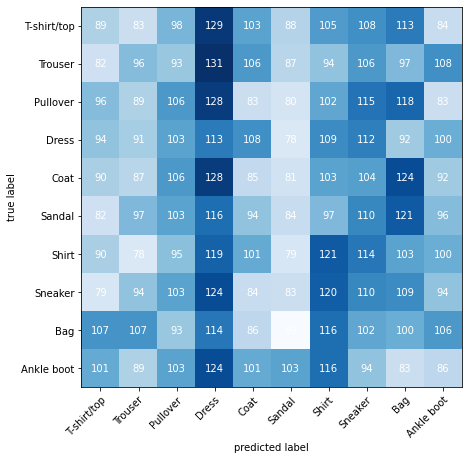

In [42]:
fig, ax = plot_confusion_matrix(
    conf_mat=c_matrix_tensor.numpy(), # Matplotblib works with numpy
    class_names=classes,
    figsize=(10, 7)
)

In [46]:
from pathlib import Path
# Create model

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

MODEL_NAME = "04_CNN_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
print(f"Save path: {MODEL_SAVE_PATH}")
torch.save(obj=model_v1.state_dict(),
           f=MODEL_SAVE_PATH)


Save path: models/04_CNN_model.pth


In [53]:
from torchvision.datasets.mnist import FashionMNIST
# Create new instance
torch.manual_seed(10)
loaded_model_v1 = FashionModelCNNV1(input_shape=1,
                                    output_shape=OUTPUT,
                                    hidden_lay=20)
# Load model

loaded_model_v1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_v1.to(device)

FashionModelCNNV1(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classificator_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=980, out_features=10, bias=True)
  )
)

In [56]:
# Evaluate loaded model
torch.manual_seed(10)

loaded_model_v1_res = eval_model(
    model=loaded_model_v1.to(device),
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)

loaded_model_v1_res

{'model_name': 'FashionModelCNNV1',
 'model_loss': 0.30833378434181213,
 'model_acc': 88.56829073482429}

In [58]:
# Check if the model resutl are close to each other
torch.isclose(torch.tensor(model_v1_res["model_loss"]),
              torch.tensor(loaded_model_v1_res["model_loss"]))

tensor(True)

**🟦EN**:

**🟥ES**:

**🟦EN**:

**🟥ES**:

**🟦EN**:

**🟥ES**:

**🟦EN**:

**🟥ES**: